In [33]:
import quimb.tensor as qtn
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
N = 3
circ = qtn.Circuit(N)

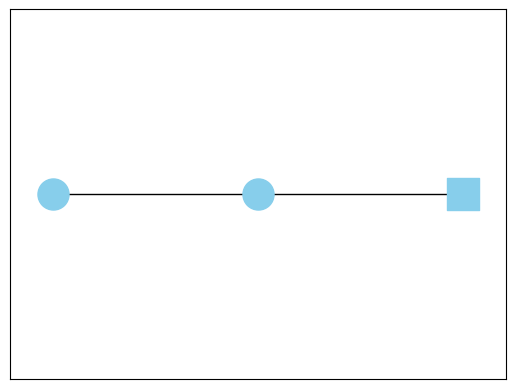

In [36]:
# Make the graph of the qubits
edges = [(0, 1), (1, 2)]
G = nx.Graph(edges)

# Position the nodes
pos = {
    0: (0, 0),
    1: (1, 0), 
    2: (2, 0)
}
subset_b = [2]
subset_c = [0, 1]
nx.draw_networkx_nodes(G, pos, nodelist=subset_b, node_shape='s', node_color='skyblue', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=subset_c, node_shape='o', node_color='skyblue', node_size=500)

# Draw edges and labels (optional)
nx.draw_networkx_edges(G, pos)

# Display the plot
plt.show()

In [25]:
def brickwork_state_init(qtm_circ):
    for i in range(1, 3):
        qtm_circ.apply_gate('H', i)
    # create the entanglement for the brickwork state
    qtm_circ.apply_gate('CZ', 0, 1)
    qtm_circ.apply_gate('CZ', 1, 2)
    return qtm_circ
# initiate brickwork state

In [26]:
# Flip state of the first qubit for a more interesting demonstration 
circ.apply_gate('X',0) 

In [27]:
print(np.round(circ.psi.to_qarray(), 10))

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]


In [28]:
circ = brickwork_state_init(circ)

In [29]:
print(np.round(circ.psi.to_qarray(), 10))

[[ 0. +0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [ 0. +0.j]
 [ 0.5+0.j]
 [ 0.5+0.j]
 [-0.5+0.j]
 [ 0.5+0.j]]


In [30]:
# Build the projector on the plus state to deterministically "simulate" measurement of the plus state 

hadamard_zeroket_zerobra_hadamard = np.matmul(np.matmul(np.array([[1, 1], [1,-1]]), np.array([[1, 0], [0,0]])), np.array([[1, 1], [1,-1]]))
proj = 1/2 * hadamard_zeroket_zerobra_hadamard

def rotation_z_gate(theta):
    rot_z = np.array([[np.exp(-1j*theta), 0],[0, np.exp(1j*theta)]])
    return rot_z

def z_rot_proj_meas(qubit, theta, qtm_circ):
    # Rotate qubit to be measured
    z_rot = rotation_z_gate(theta)
    qtm_circ.apply_gate(z_rot, qubit)
    
    # Apply the "measurement" projector
    qtm_circ.apply_gate(proj, qubit)

    # Reormalize the state
    state_vector = np.round(qtm_circ.psi.to_qarray(), 10)
    ## Compute renormalization factor from the norm of the vector after projective measurement
    renorm_factor = np.sqrt(np.dot(state_vector.conj().T, state_vector))
    ## Apply renormalization with identity matrix on measured qubit
    renorm_matrix = np.array([[1, 0], [0, 1]])* 1/renorm_factor
    qtm_circ.apply_gate(renorm_matrix, qubit)



In [31]:
for i in [0, 1]:
    z_rot_proj_meas(i, 0, circ)

In [32]:
circ.apply_gate('H', 0)
circ.apply_gate('H', 1)

list = np.nonzero(np.round(circ.psi.to_qarray(), 10))
sv =np.round(circ.psi.to_qarray(), 10) #np.round(np.exp(-1j * np.pi/2)*circ.psi.to_qarray(), 10)
print(list[0], len(sv))

for i in list[0]:
    print(sv[i])


[1] 8
[1.+0.j]
